In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [2]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [3]:

## remove the x-axis text and tick
## plot.margin to adjust the white space between each plot.
## ... pass any arguments to VlnPlot in Seurat
modify_vlnplot<- function(obj, 
                          feature, 
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  p<- VlnPlot(obj, features = feature, pt.size = pt.size, ... )  + 
    xlab("") + ylab(feature) + ggtitle("") + 
    theme(legend.position = "none", 
          axis.text.x = element_blank(), 
          axis.ticks.x = element_blank(), 
          axis.title.y = element_text(size = rel(1), angle = 0), 
          axis.text.y = element_text(size = rel(1)), 
          plot.margin = plot.margin ) 
  return(p)
}

## extract the max value of the y axis
extract_max<- function(p){
  ymax<- max(ggplot_build(p)$layout$panel_scales_y[[1]]$range$range)
  return(ceiling(ymax))
}


## main function
StackedVlnPlot<- function(obj, features,
                          pt.size = 0, 
                          plot.margin = unit(c(-0.75, 0, -0.75, 0), "cm"),
                          ...) {
  
  plot_list<- purrr::map(features, function(x) modify_vlnplot(obj = obj,feature = x, ...))
  
  # Add back x-axis title to bottom plot. patchwork is going to support this?
  plot_list[[length(plot_list)]]<- plot_list[[length(plot_list)]] +
    theme(axis.text.x=element_text(), axis.ticks.x = element_line())
  
  # change the y-axis tick to only max value 
  ymaxs<- purrr::map_dbl(plot_list, extract_max)
  plot_list<- purrr::map2(plot_list, ymaxs, function(x,y) x + 
                            scale_y_continuous(breaks = c(y)) + 
                            expand_limits(y = y))

  p<- patchwork::wrap_plots(plotlist = plot_list, ncol = 1)
  return(p)
}

In [4]:
filenames3 <- dir()
# 通过正则，获取所有xlsx结尾的文件名
filenames4 <- grep('\\.csv', filenames3, value = TRUE)
prove<-unique(filenames4)
# 初始化数据框，用于后面的数据合并
data4 <- data.frame()
filenames4

[1] "0717-exprmat.csv"                 "0717.cancer.top100diff.csv"      
 [3] "0717.normal.top100diff.csv"       "0806.top100can.type2specific.csv"
 [5] "circRNAannotation2-exo.csv"       "circRNAannotation2.csv"          
 [7] "H1.csv"                           "H2.csv"                          
 [9] "H5.csv"                           "H7.csv"                          
[11] "Q3.csv"                           "Q5.csv"                          
[13] "Q8.csv"                           "Q9.csv"                          
[15] "SRR5712482.1.csv"                 "SRR5712483.1.csv"                
[17] "SRR5712484.1.csv"                 "SRR5712485.1.csv"                
[19] "SRR5712486.1.csv"                 "SRR5712487.1.csv"                
[21] "SRR5712488.1.csv"                 "SRR5712489.1.csv"                
[23] "SRR5712490.1.csv"                 "SRR5712491.1.csv"                
[25] "SRR5712492.1.csv"                 "SRR5712493.1.csv"                
[27] "SRR5712494.1.csv"                 "SRR5712495.1.csv"                
[29] "SRR5712496.1.csv"                 "SRR5712497.1.csv"                
[31] "SRR5712498.1.csv"                 "SRR5712499.1.csv"                
[33] "SRR5712500.1.csv"                 "SRR5712501.1.csv"                
[35] "SRR5712502.1.csv"                 "SRR5712503.1.csv"                
[37] "SRR5712504.1.csv"                 "SRR5712505.1.csv"                
[39] "SRR5712506.1.csv"                 "SRR5712507.1.csv"                
[41] "SRR5712508.1.csv"                 "SRR5712509.1.csv"                
[43] "SRR5712510.1.csv"                 "SRR5712511.1.csv"                
[45] "SRR5712512.1.csv"                 "SRR5712513.1.csv"                
[47] "T4.csv"

In [5]:
length(filenames4)

[1] 47

In [6]:
filenames4<-filenames4[7:47]

In [7]:
filenames4<-filenames4[-8]

In [8]:
filenames4<-filenames4[-2]

In [9]:
filenames4<-filenames4[-6]

In [10]:
filenames4<-filenames4[-4]

In [11]:
temp<-read.csv(filenames4[1],header=T)
temp
temp2<-temp[,c(1,8)]

X,circfind,CIRI,findcirc,circexp,sum,count,result
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
chr1_100275598_100277316_+,0,69,66,0,2,135,67.50000
chr1_100424221_100442996_+,0,25,4,0,2,29,14.50000
chr1_100494817_100499262_+,0,82,84,42,3,208,69.33333
chr1_100906851_100921841_+,0,253,62,68,3,383,127.66667
chr1_10095460_10105744_+,0,105,109,101,3,315,105.00000
chr1_10134987_10137205_+,0,67,129,0,2,196,98.00000
chr1_10327677_10334638_+,62,64,0,0,2,126,63.00000
chr1_103527694_103541475_+,0,10,20,0,2,30,15.00000
chr1_10403070_10404279_+,0,79,74,0,2,153,76.50000


In [12]:
#count of single circRNA max: 1000

In [13]:
temp2$result<-round(temp2$result)
temp2<-temp2[which(temp2$result<1000),]
colnames(temp2)<-c("circRNA",filenames4[1])
data4 <- temp2

In [14]:
for (i in 2:36){
  temp<-read.csv(filenames4[i],header=T)
  temp
  temp2<-temp[,c(1,8)]
  temp2$result<-round(temp2$result)
  temp2<-temp2[which(temp2$result<1000),]
  colnames(temp2)<-c("circRNA",filenames4[i])
  data4 <- merge(data4,temp2,all=T)
}

In [15]:
data4[is.na(data4)]<-0
data4

circRNA,H1.csv,H5.csv,H7.csv,Q5.csv,SRR5712482.1.csv,SRR5712483.1.csv,SRR5712484.1.csv,SRR5712485.1.csv,SRR5712486.1.csv,⋯,SRR5712504.1.csv,SRR5712505.1.csv,SRR5712506.1.csv,SRR5712507.1.csv,SRR5712508.1.csv,SRR5712509.1.csv,SRR5712510.1.csv,SRR5712511.1.csv,SRR5712512.1.csv,SRR5712513.1.csv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100007033_100017815_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100011364_100017815_+,0,8,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100049908_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,5,0,0
chr1_100049908_100069685_+,0,0,12,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
chr1_100049908_100080659_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100058665_100061949_+,0,0,0,0,14,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100059877_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_10007569_10008274_+,0,0,0,0,11,0,8,0,0,⋯,0,0,0,0,0,24,0,6,2,0


In [16]:
rownames(data4)<-data4$circRNA
data4$circRNA<-NULL

In [17]:
#circRNA  in at least 3 samples
normal <- CreateSeuratObject(counts = data4, project = "normal",min.cells=2)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [18]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
H1.csv,normal,211699,2042
H5.csv,normal,132555,4668
H7.csv,normal,178884,3337
Q5.csv,normal,90399,3411
SRR5712482.1.csv,normal,88247,3439
SRR5712483.1.csv,normal,89391,2673
SRR5712484.1.csv,normal,167567,6565
SRR5712485.1.csv,normal,89010,1742
SRR5712486.1.csv,normal,72883,3474


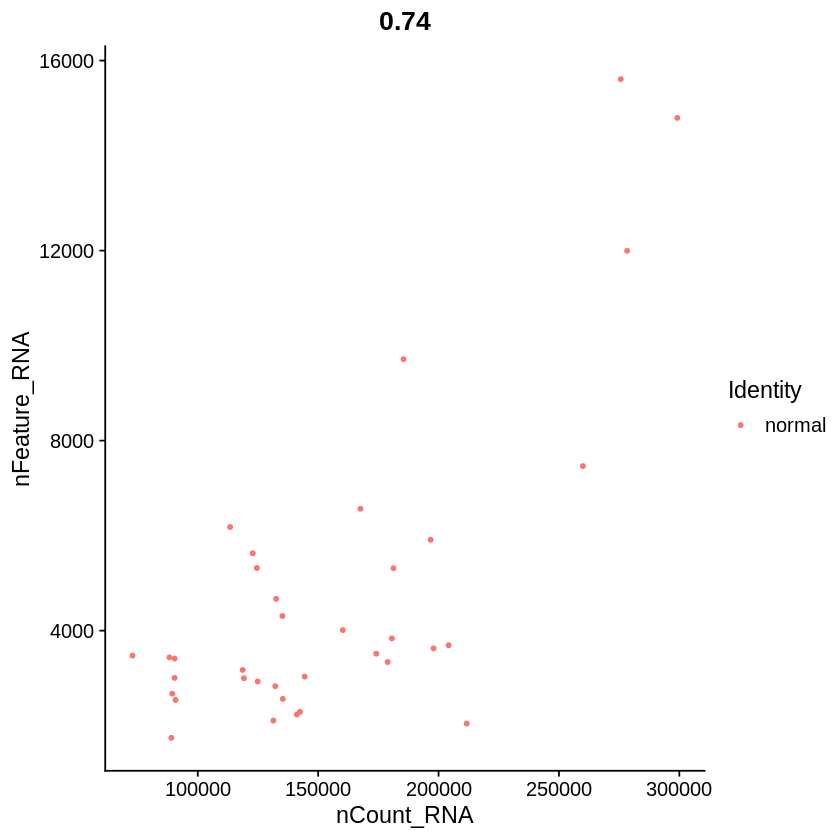

In [19]:
FeatureScatter(normal, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

In [20]:
normal

An object of class Seurat 
26382 features across 36 samples within 1 assay 
Active assay: RNA (26382 features, 0 variable features)

In [21]:
normal <- NormalizeData(normal, normalization.method = "LogNormalize")

When using repel, set xnudge and ynudge to 0 for optimal results



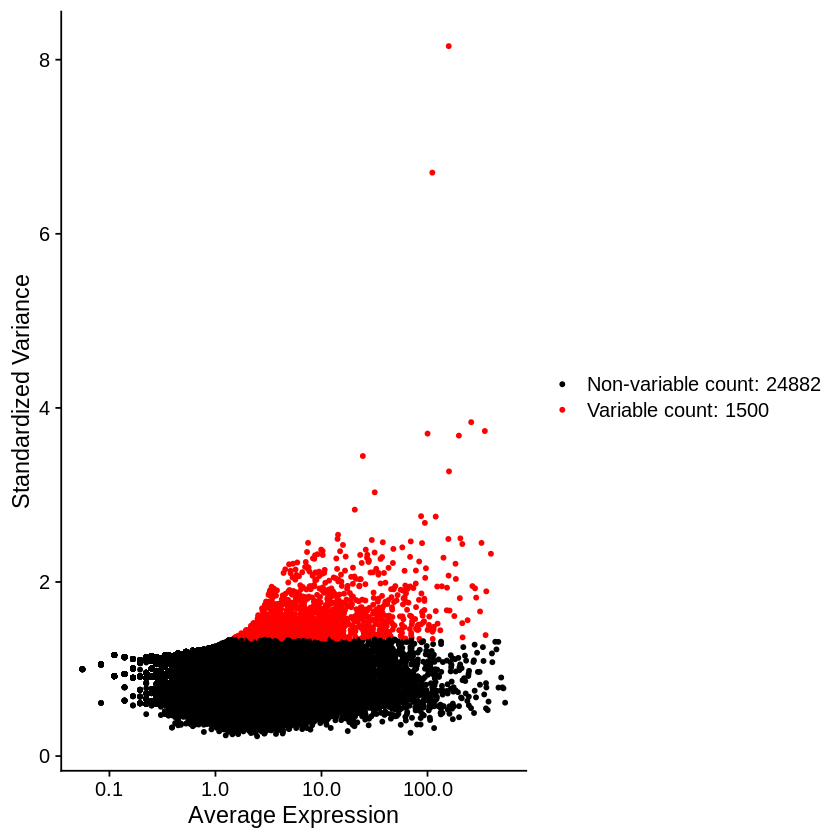

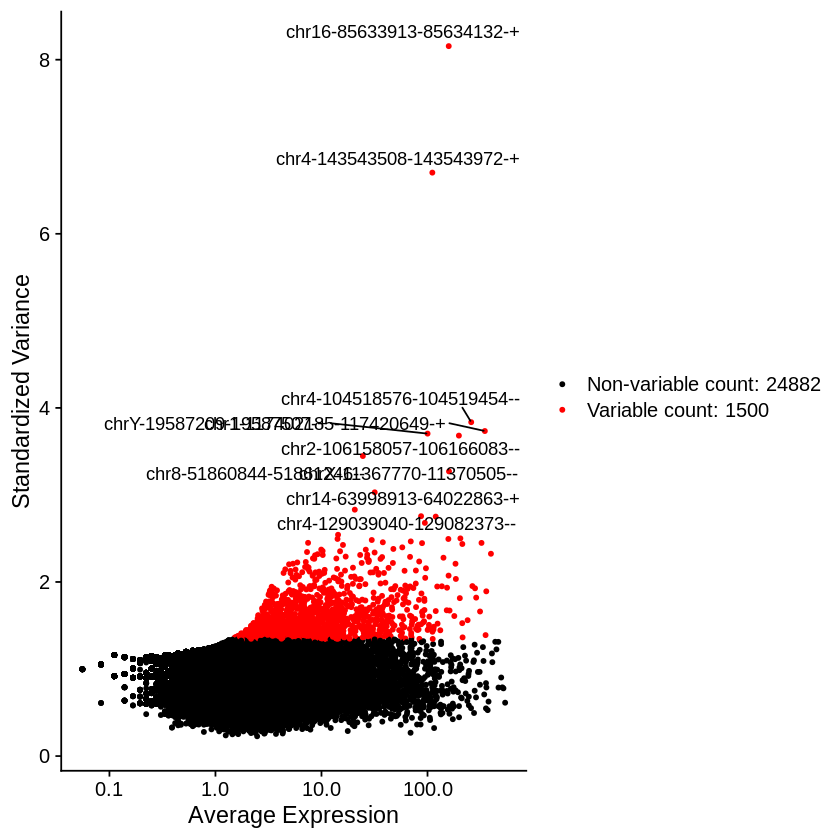

In [22]:
normal <- FindVariableFeatures(normal, selection.method = "vst", nfeatures =1500)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(normal), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(normal)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1
plot2

In [23]:
pdf("0805-scatter.exo-NP.merge.neut.pdf",width=7,height=6)
plot2
dev.off()

png 
  2

In [24]:
all.genes <- rownames(normal)
normal <- ScaleData(normal, features = all.genes)

Centering and scaling data matrix



In [25]:
normal <- RunPCA(normal, features = VariableFeatures(object = normal),npcs = 35)

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  chr8-22474953-22475624-+, chr9-16727796-16738485--, chr16-30483826-30484263-+, chr17-75242335-75243570--, chr3-193657079-193667280-+, chr12-46239678-46243314--, chr5-50759642-50763242-+, chr21-14991200-15043574--, chr14-65615977-65629606-+, chr12-10386902-10393867-- 
	   chr7-23185069-23187146-+, chr11-117152440-117163892-+, chr9-83768817-83788678--, chr19-21974728-21988909--, chr1-151117391-151118139-+, chr1-805798-810170--, chr10-124681606-124682379--, chr3-169976945-169985865-+, chr15-75859877-75873568-+, chr6-116689319-116705160-+ 
	   chr19-52282110-52283413-+, chr3-170113359-170122744--, chr3-136464880-136502779--, chr3-168036835-168041474--, chr8-123333877-123337821--, chr10-34269656-34284245--, chr5-65988634-66014725-+, chr8-68022035-68060779-+, chr10-32034689-32037607--, chr11-13413529-13421838-- 
Negativ

In [26]:
normal@meta.data$label<-c(c('ICC','ICC','ICC','ICC'),rep('healthy',times=32))

In [27]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
H1.csv,normal,211699,2042,ICC
H5.csv,normal,132555,4668,ICC
H7.csv,normal,178884,3337,ICC
Q5.csv,normal,90399,3411,ICC
SRR5712482.1.csv,normal,88247,3439,healthy
SRR5712483.1.csv,normal,89391,2673,healthy
SRR5712484.1.csv,normal,167567,6565,healthy
SRR5712485.1.csv,normal,89010,1742,healthy
SRR5712486.1.csv,normal,72883,3474,healthy


In [28]:
options(repr.plot.height=6,repr.plot.width=7)

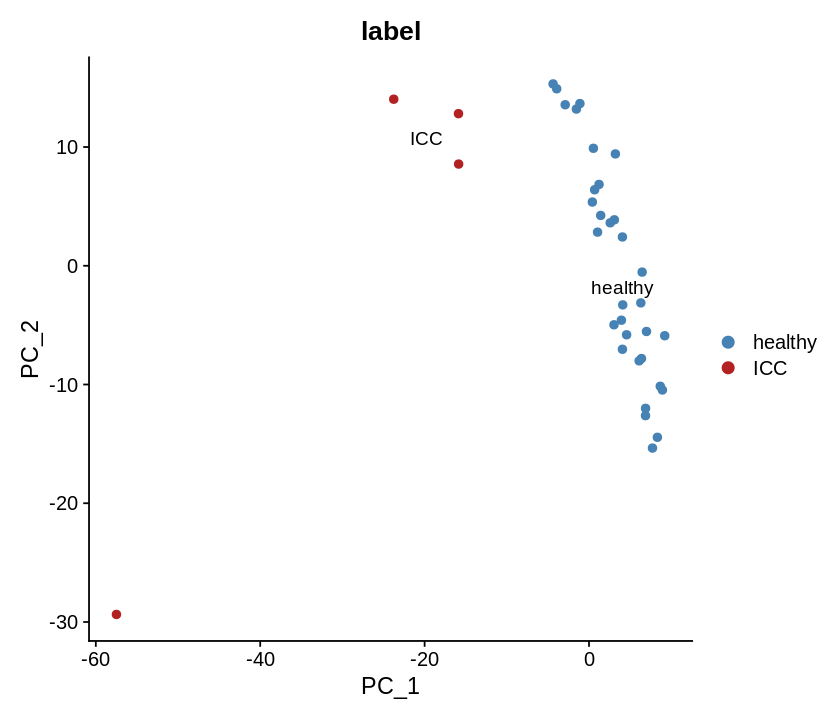

In [29]:
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2,cols=c('steelblue','firebrick'))

In [30]:
pdf("0805-pca.exo.NP.neut.pdf",width=7,height=6)
DimPlot(normal, reduction = "pca",group.by='label',label=T,pt.size=2,cols=c('steelblue','firebrick'))
dev.off()

png 
  2

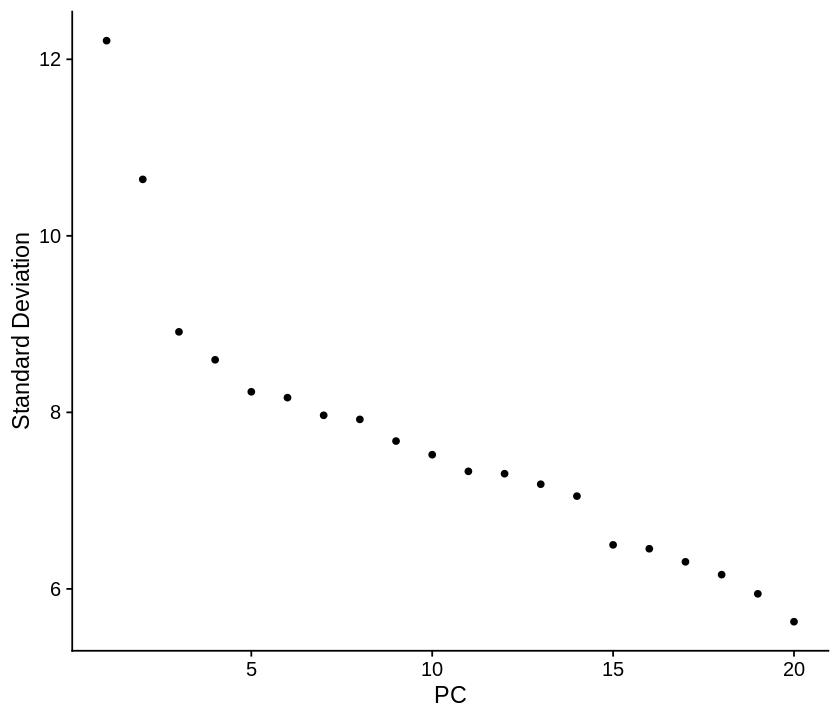

In [31]:
ElbowPlot(normal)

In [32]:
Idents(object = normal) <- "label"

In [33]:
normal@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,label
,<fct>,<dbl>,<int>,<chr>
H1.csv,normal,211699,2042,ICC
H5.csv,normal,132555,4668,ICC
H7.csv,normal,178884,3337,ICC
Q5.csv,normal,90399,3411,ICC
SRR5712482.1.csv,normal,88247,3439,healthy
SRR5712483.1.csv,normal,89391,2673,healthy
SRR5712484.1.csv,normal,167567,6565,healthy
SRR5712485.1.csv,normal,89010,1742,healthy
SRR5712486.1.csv,normal,72883,3474,healthy


In [34]:
normal3.markers <- FindAllMarkers(normal,test.use='wilcox',only.pos=TRUE)

Calculating cluster ICC

Calculating cluster healthy



In [35]:
marker<-normal3.markers %>% group_by(cluster) %>% top_n(n = 100, wt = avg_log2FC)

In [36]:
table(marker$cluster)


    ICC healthy 
    100      91 

In [37]:
marker2<-normal3.markers %>% group_by(cluster) %>% top_n(n = 8, wt = avg_log2FC)

In [38]:
options(repr.plot.height=8,repr.plot.width=8)

In [39]:
genedraw<-c(marker2$gene,'chr1-113834909-113855049--','chr5-65451474-65473952--',"chrX-148651998-148662768-+")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



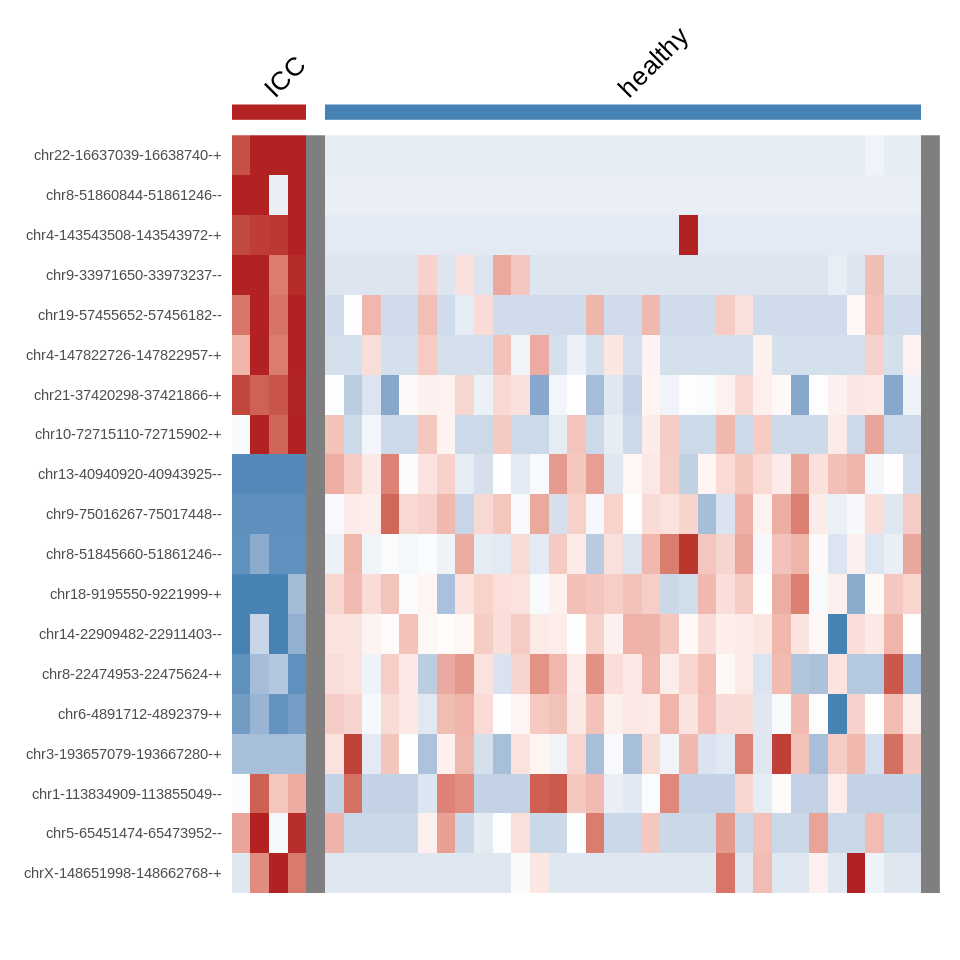

In [40]:
DoHeatmap(normal, features =genedraw,group.colors=c('firebrick','steelblue')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))

In [41]:
pdf('0805-heatmap-exo.neut.pdf',width=7,height=6)
DoHeatmap(normal, features =genedraw,group.colors=c('firebrick','steelblue')) + NoLegend() + scale_fill_gradientn(colors = c("steelblue", "white", "firebrick"))
dev.off()

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [42]:
save(normal,file='0805-seurat-circRNA.neut.Rda')

In [43]:
top100<-read.csv('0806.top100can.type2specific.csv')

In [44]:
expmat  <- as.data.frame(normal@assays$RNA@data)

In [45]:
top100draw<-intersect(top100$gene,rownames(expmat))

In [46]:
options(repr.plot.height=10,repr.plot.width=5)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', 

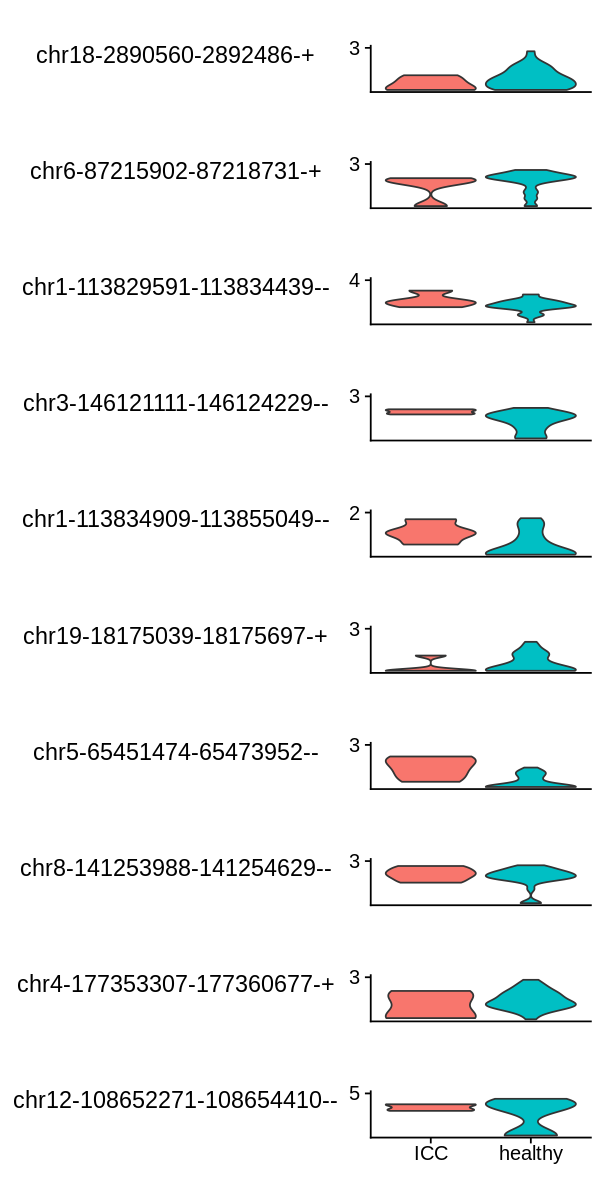

In [47]:
features<- top100draw[1:10]
StackedVlnPlot(obj =normal, features = features)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', 

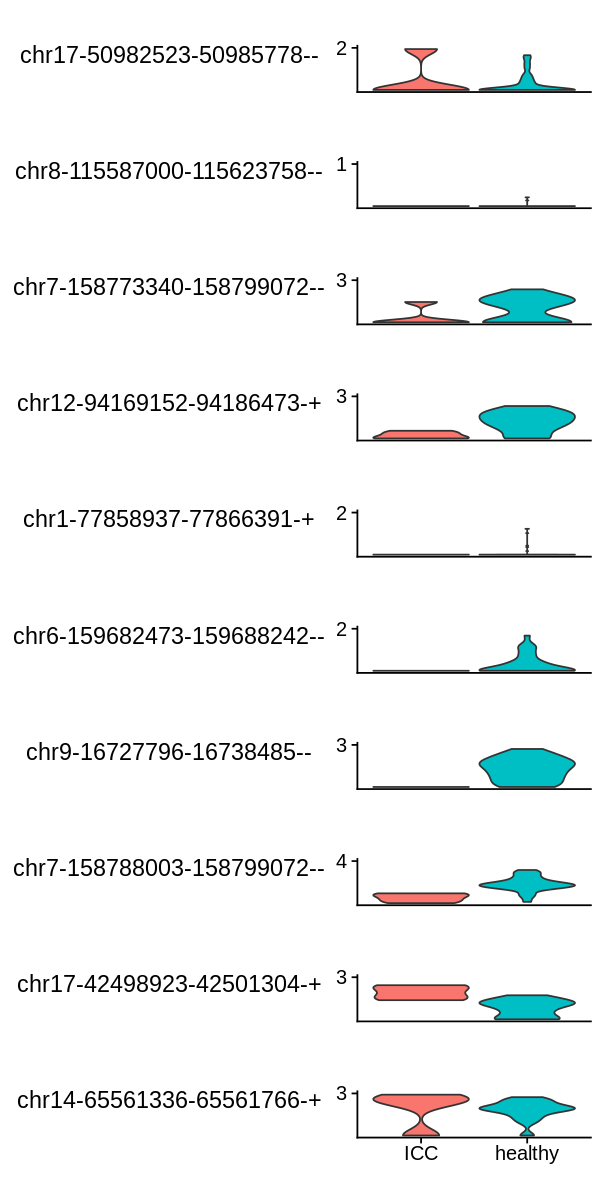

In [48]:
features<- top100draw[11:20]
StackedVlnPlot(obj =normal, features = features)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



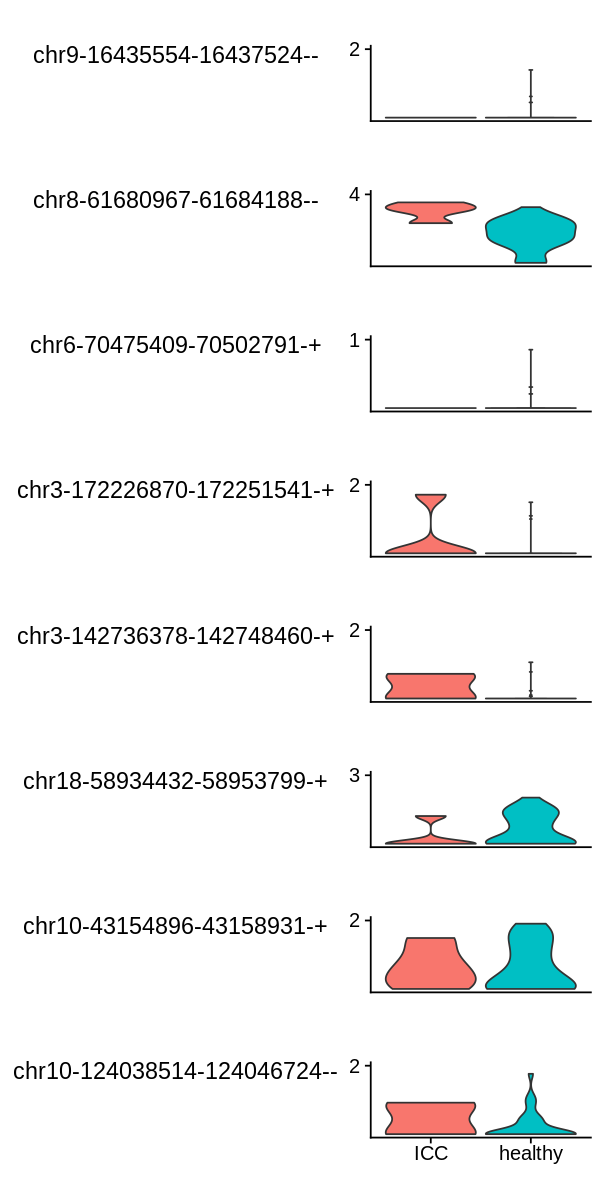

In [49]:
features<- top100draw[21:28]
StackedVlnPlot(obj =normal, features = features)

In [50]:
expmat4<-as.data.frame(t(expmat))

In [51]:
expmat4$sample<-rownames(expmat4)

In [52]:
expmat4$group<-c(rep('ICC',times=4),rep('healthy',times=32))

In [53]:
write.csv(expmat4,'0717-exprmat.csv')

In [54]:
options(repr.plot.height=5,repr.plot.width=3)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




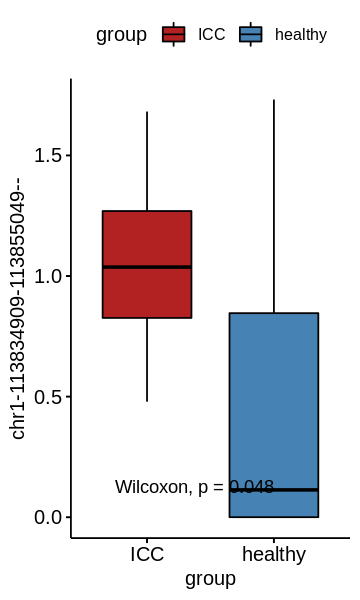

In [55]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr1-113834909-113855049--", fill = "group",palette =c("firebrick",'steelblue'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('chr1-113834909-113855049.pdf',height=5,width=3)

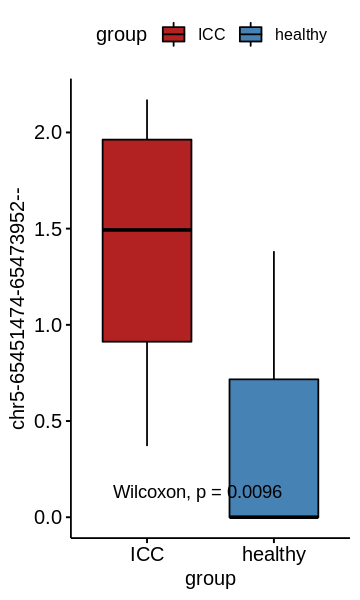

In [56]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y="chr5-65451474-65473952--", fill = "group",palette =c("firebrick",'steelblue'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('chr5-65451474-65473952.pdf',height=5,width=3)

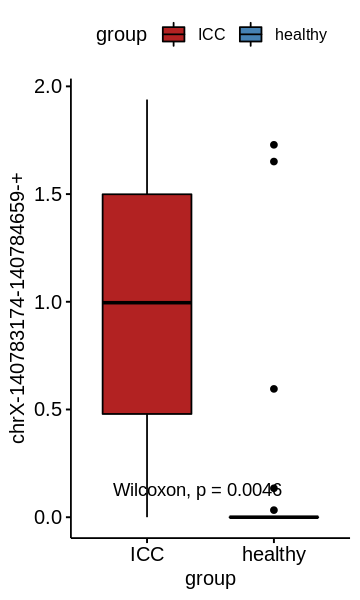

In [57]:
library(ggpubr)
p<-ggboxplot(expmat4, x="group", y='chrX-140783174-140784659-+', fill = "group",palette =c("firebrick",'steelblue'))+
    stat_compare_means(label.y = 0.1)
p
ggsave('chrX-140783174-140784659-+.pdf',height=5,width=3)

In [58]:
expr_df<-read.csv(file='circRNAannotation2.csv')

In [59]:
expr_df

X,gene_name,circRNA,strand
<int>,<chr>,<chr>,<chr>
1,SAMD11,chr1_935771_939412_+,+_+
2,NOC2L,chr1_955922_957273_-,-_-
3,AGRN,chr1_1035276_1041702_+,+_+
4,AGRN,chr1_1043238_1051815_+,+_+
5,AGRN,chr1_1047326_1050837_+,+_+
6,SDF4,chr1_1217376_1217686_-,-_-
7,SDF4,chr1_1218793_1223331_-,-_-
8,SDF4,chr1_1223243_1223968_-,-_-
9,B3GALT6,chr1_1233247_1233878_+,+_+


In [60]:
genedraw<-gsub('-','_',genedraw)

In [61]:
genedraw<-gsub('__','_-',genedraw)

In [62]:
genedraw<-as.data.frame(genedraw)
colnames(genedraw)<-'circRNA'

In [63]:
merge(expr_df,genedraw)

circRNA,X,gene_name,strand
<chr>,<int>,<chr>,<chr>
chr1_113834909_113855049_-,3166,PTPN22,-_-
chr10_72715110_72715902_+,40612,MCU,+_+
chr13_40940920_40943925_-,46575,ELF1,-_-
chr14_22909482_22911403_-,47764,RBM23,-_-
chr18_9195550_9221999_+,58039,ANKRD12,+_+
chr19_57455652_57456182_-,62221,AC004076.1,-_-
chr19_57455652_57456182_-,62222,VN1R1,-_-
chr21_37420298_37421866_+,63831,DYRK1A,+_+
chr4_143543508_143543972_+,19046,SMARCA5,+_+
